In [4]:
import numpy as np 
import pandas as pd 

In [5]:
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [6]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df_train.shape

(550068, 12)

In [8]:
df_test.shape

(233599, 11)

In [9]:
# Merge train and test data

df = pd.concat([df_train,df_test],axis=0)
df_2 = df.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [11]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [12]:
df = df.drop(['User_ID'],axis=1)

In [13]:
df = df.drop(['Product_ID'],axis = 1)

In [14]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# Handling Categorical features

In [15]:
df['Gender']= df['Gender'].map({'F':0,'M':1})

In [16]:
df['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: Gender, Length: 783667, dtype: int64

In [17]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Handling Age

In [18]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
df['Age']= df['Age'].map({'0-17':1,'18-25':2, '26-35':3,'36-45':4,'46-50':5, '51-55':6, '55+':7 })

In [20]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

### Handling City

In [21]:
df_city = pd.get_dummies(df['City_Category'],drop_first = True, dtype= int)

In [22]:
df = pd.concat([df,df_city], axis = 1)
df = df.drop('City_Category', axis = 1)
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


### Handling Stay_In_Current_City_Years

In [23]:
df['Stay_In_Current_City_Years'] =df['Stay_In_Current_City_Years'].str.replace('+','')

In [24]:
# Convert it into integers

df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype(int)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          537685 non-null  float64
 7   Product_Category_3          237858 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


### Handle Missing Values

In [26]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [27]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [28]:
# Discrete feature thus using mode to replace null values
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [29]:
df['Product_Category_2'].isnull().sum()

0

In [30]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0]) 

# Preprocessing

In [31]:
# My test data

In [32]:
df_test = df[df['Purchase'].isnull()]

In [33]:
# My train data

In [34]:
df_train = df[~df['Purchase'].isnull()]

In [35]:
X = df_train.drop('Purchase', axis = 1)
y = df_train['Purchase']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize different regression models
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(random_state=42)

In [39]:
# Linear regression
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [41]:
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred_linear = linear_regressor.predict(X_test)
y_pred_decision_tree = decision_tree_regressor.predict(X_test)
y_pred_random_forest = random_forest_regressor.predict(X_test)

In [43]:
# Calculate mean squared error for each model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)

# Print mean squared error for each model
print("Mean Squared Error (Linear Regression):", mse_linear)
print("Mean Squared Error (Decision Tree Regression):", mse_decision_tree)
print("Mean Squared Error (Random Forest Regression):", mse_random_forest)

Mean Squared Error (Linear Regression): 21939163.32153542
Mean Squared Error (Decision Tree Regression): 11138426.58622296
Mean Squared Error (Random Forest Regression): 9342676.67755661


In [44]:
# Select the model with the lowest mean squared error
best_model = min([(mse_linear, 'Linear Regression'),
                  (mse_decision_tree, 'Decision Tree Regression'),
                  (mse_random_forest, 'Random Forest Regression')], key=lambda x: x[0])

print("Best Model:", best_model[1])


Best Model: Random Forest Regression


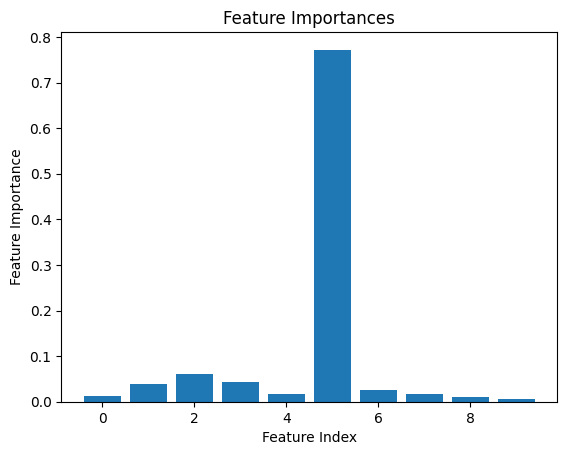

In [45]:
import matplotlib.pyplot as plt

# Visualize feature importances
feature_importances = random_forest_regressor.feature_importances_
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

## Hyperparameter tuning using GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV, KFold
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [10, 20, 30], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

## Cross-validation

In [48]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", -mse_scores.mean())

Cross-Validation Mean Squared Error: 8636441.508279042


# XGBoost Regressor

In [50]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [3,5,10]
}

# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


In [51]:
# Train XGBoost model with best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [52]:
# Make predictions
y_pred = best_xgb_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 8821624.017488353


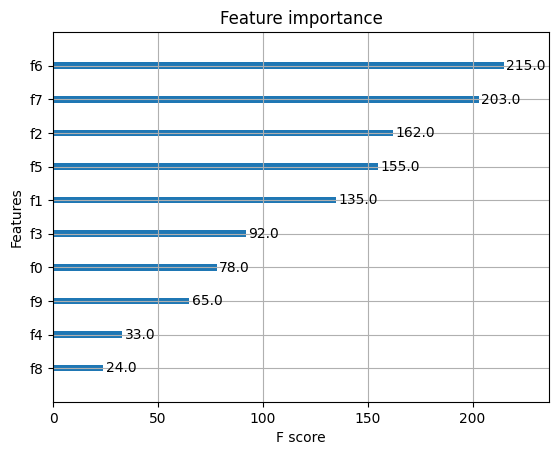

In [53]:
# Visualize feature importances
xgb.plot_importance(best_xgb_regressor)
plt.show()

In [54]:
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Cross-Validation Mean Squared Error:", -mse_scores.mean())


Cross-Validation Mean Squared Error: 8728323.19439808
